In [114]:
import pandas as pd


df = pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\Project 4\Project4-MachineLearning\df_joined_data.csv")

C:\Users\conne\AppData\Local\Temp\ipykernel_3608\1570110770.py:3: DtypeWarning: Columns (79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\Project 4\Project4-MachineLearning\df_joined_data.csv")


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the sale price range and desired property classes
price_lower_bound = 200000
price_upper_bound = 750000
desired_classes = [202, 203, 204, 205, 206, 207, 208, 209, 210, 234, 278, 295]

# Assuming the DataFrame is named 'data'
price_filtered_data = df[(df['Sale Price'] >= price_lower_bound) & (df['Sale Price'] <= price_upper_bound)]

# Filter the already price-filtered data for desired property classes
final_filtered_data_2 = price_filtered_data[price_filtered_data['Property Class'].isin(desired_classes)]

# Check the unique property classes and sale price stats to confirm the filter
print("Unique Property Classes:", final_filtered_data_2['Property Class'].unique())
print("Sale Price Stats:", final_filtered_data_2['Sale Price'].describe())

print("Sale Price:", final_filtered_data_2['Sale Price'].describe())
print("Sale Date:", final_filtered_data_2['Sale Date'].describe())
print('latitude:', final_filtered_data_2['latitude'].describe())
print("longitude:", final_filtered_data_2['longitude'].describe())
print("Building Square Feet:", final_filtered_data_2['Building Square Feet'].describe())

Unique Property Classes: [207 206 278 295 205 203 210 204 202 234 209 208]
Sale Price Stats: count     28569.000000
mean     354461.566803
std      136040.772332
min      200000.000000
25%      247500.000000
50%      313750.000000
75%      425000.000000
max      750000.000000
Name: Sale Price, dtype: float64
Sale Price: count     28569.000000
mean     354461.566803
std      136040.772332
min      200000.000000
25%      247500.000000
50%      313750.000000
75%      425000.000000
max      750000.000000
Name: Sale Price, dtype: float64
Sale Date: count          28569
unique          1723
top       01/03/2018
freq              56
Name: Sale Date, dtype: object
latitude: count    26727.000000
mean        41.902367
std          0.093893
min         41.650938
25%         41.828410
50%         41.939803
75%         41.973124
max         42.022650
Name: latitude, dtype: float64
longitude: count    26727.000000
mean       -87.729082
std          0.060081
min        -87.846184
25%        -87.7799

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import GridSearchCV

# Convert 'Sale Date' to datetime if not already converted
final_filtered_data_2['Sale Date'] = pd.to_datetime(final_filtered_data_2['Sale Date'])

# Transform 'Sale Date' to an ordinal format (number of days since a fixed date)
final_filtered_data_2['Sale Date'] = final_filtered_data_2['Sale Date'].apply(lambda x: x.toordinal())

# Now 'Sale Date' is in a numeric format that can be processed by your machine learning pipeline
X = final_filtered_data_2[['latitude', 'longitude', 'Sale Date', 'Building Square Feet']]
y = final_filtered_data_2['Sale Price']

# Splitting the data and keeping the index for merging later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define the numeric transformer with an imputer and scaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Creating a transformer to apply a logarithmic transformation
log_transformer = FunctionTransformer(np.log1p, validate=False)

# Combine transformers for all numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['latitude', 'longitude', 'Sale Date']),
        ('log_transform', log_transformer, ['Building Square Feet'])
    ])

# Create a model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(random_state=42))])

# Define the parameter grid
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

cv = GridSearchCV(estimator=pipeline, param_grid=params, n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)

# Best model parameters
print("Best model parameters:", cv.best_params_)

# Using the best estimator from RandomizedSearchCV
best_clf = cv.best_estimator_

# Predict with the best model
predictions = best_clf.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

C:\Users\conne\AppData\Local\Temp\ipykernel_3608\1045174221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data_2['Sale Date'] = pd.to_datetime(final_filtered_data_2['Sale Date'])
C:\Users\conne\AppData\Local\Temp\ipykernel_3608\1045174221.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data_2['Sale Date'] = final_filtered_data_2['Sale Date'].apply(lambda x: x.toordinal())


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best model parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}
Root Mean Squared Error: 81292.38962208875
Mean Absolute Error: 58840.00003447024


In [79]:
# Create DataFrame to compare predictions with actual values
results = pd.DataFrame({
    "Prediction": predictions,
    "Actual": y_test
}).reset_index(drop=True)

# Display the first 10 entries of the results DataFrame
print(results.head(10))

   Prediction  Actual
0   278637.99  210000
1   416607.24  395000
2   216996.80  205000
3   222268.50  206000
4   236921.47  218000
5   552117.50  275000
6   266247.95  235000
7   213731.35  214000
8   364223.05  450000
9   258446.66  212000


In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Prepare features and target including the 'Building Square Footage'
X = final_filtered_data_2[['latitude', 'longitude', 'Sale Date', 'Building Square Feet']]
y = final_filtered_data_2['Sale Price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define the numeric transformer with an imputer and scaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Creating a transformer to apply a logarithmic transformation
log_transformer = FunctionTransformer(np.log1p, validate=False)

# Combine transformers for all numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['latitude', 'longitude', 'Sale Date']),
        ('log_transform', log_transformer, ['Building Square Feet'])
    ])

# Define base models for stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=5))
]

# Create the Stacking model
stack_reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=100, random_state=42), passthrough=True)

# Create a model pipeline with the stacking regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('stack_reg', stack_reg)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict with the best model
predictions = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 83056.65112817104
Mean Absolute Error: 60180.535983363065


In [107]:
# Create DataFrame to compare predictions with actual values
results = pd.DataFrame({
    "Prediction": predictions,
    "Actual": y_test.reset_index(drop=True),
    "Latitude": X_test['latitude'].reset_index(drop=True),
    "Longitude": X_test['longitude'].reset_index(drop=True)
})

# Display the first 10 entries of the results DataFrame
print(results.head(10))

   Prediction  Actual   Latitude  Longitude
0   290539.52  210000  41.918717 -87.802939
1   423389.26  395000  41.977177 -87.711502
2   217639.00  205000  41.725079 -87.581147
3   226974.00  206000  41.804469 -87.740982
4   245499.00  218000  41.781019 -87.765863
5   453908.00  275000  41.840586 -87.652010
6   253350.00  235000  41.797534 -87.784064
7   228792.68  214000  41.787728 -87.708649
8   309636.00  450000  41.974236 -87.715104
9   267007.50  212000  41.935040 -87.777791


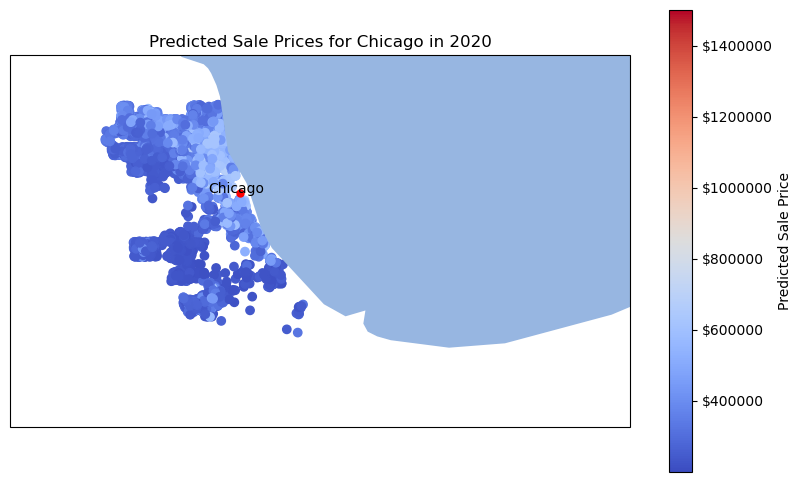

In [90]:
# Assuming clf is your trained model
# Predicting using the test dataset or any new dataset
predicted_prices = predictions

# Adding predictions to the test dataset or creating a new DataFrame for visualization
X_test['Predicted Sale Price'] = predicted_prices

# Now use this updated DataFrame for your visualization
# Here's a revised version of your matplotlib code:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-88, -87, 41.5, 42.1])  # Focus on Chicago

# Natural features with high resolution
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))

# Adding city points
chicago = Point(-87.6298, 41.8781)
ax.plot(chicago.x, chicago.y, marker='o', color='red', markersize=5, transform=ccrs.Geodetic())
ax.text(chicago.x - 0.05, chicago.y, 'Chicago', transform=ccrs.Geodetic())

# Plotting predicted data
scatter = ax.scatter(X_test['longitude'], X_test['latitude'], c=X_test['Predicted Sale Price'],
                     cmap='coolwarm', vmin=200001, vmax=1500000, label='Predicted Sale Price', transform=ccrs.PlateCarree())

# Colorbar and labels
plt.colorbar(scatter, ax=ax, format=FormatStrFormatter('$%.0f')).set_label('Predicted Sale Price')
plt.title('Predicted Sale Prices for Chicago in 2020')  # Adjust the title as per actual prediction year
plt.grid(True)
plt.show()

In [110]:
import pandas as pd

# First, drop any rows with NaN values in 'latitude' or 'longitude' which are essential for mapping
results.dropna(subset=['Latitude', 'Longitude', 'Prediction', 'Actual'], inplace=True)

In [111]:
import folium

# Assuming X_test_with_predictions has been cleaned of NaN values
map = folium.Map(location=[final_filtered_data_2['latitude'].mean(), final_filtered_data_2['longitude'].mean()], zoom_start=11, tiles='OpenStreetMap')

for idx, row in results.iterrows():
    popup_text = f"Predicted Price: ${row['Prediction']:.2f}<br>Sale Price: ${row['Actual']:.2f}"
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=200)
    ).add_to(map)

map.save('index.html')
